<a href="https://colab.research.google.com/github/MRazin172/Speech_Processing/blob/main/Speech_PracticeLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

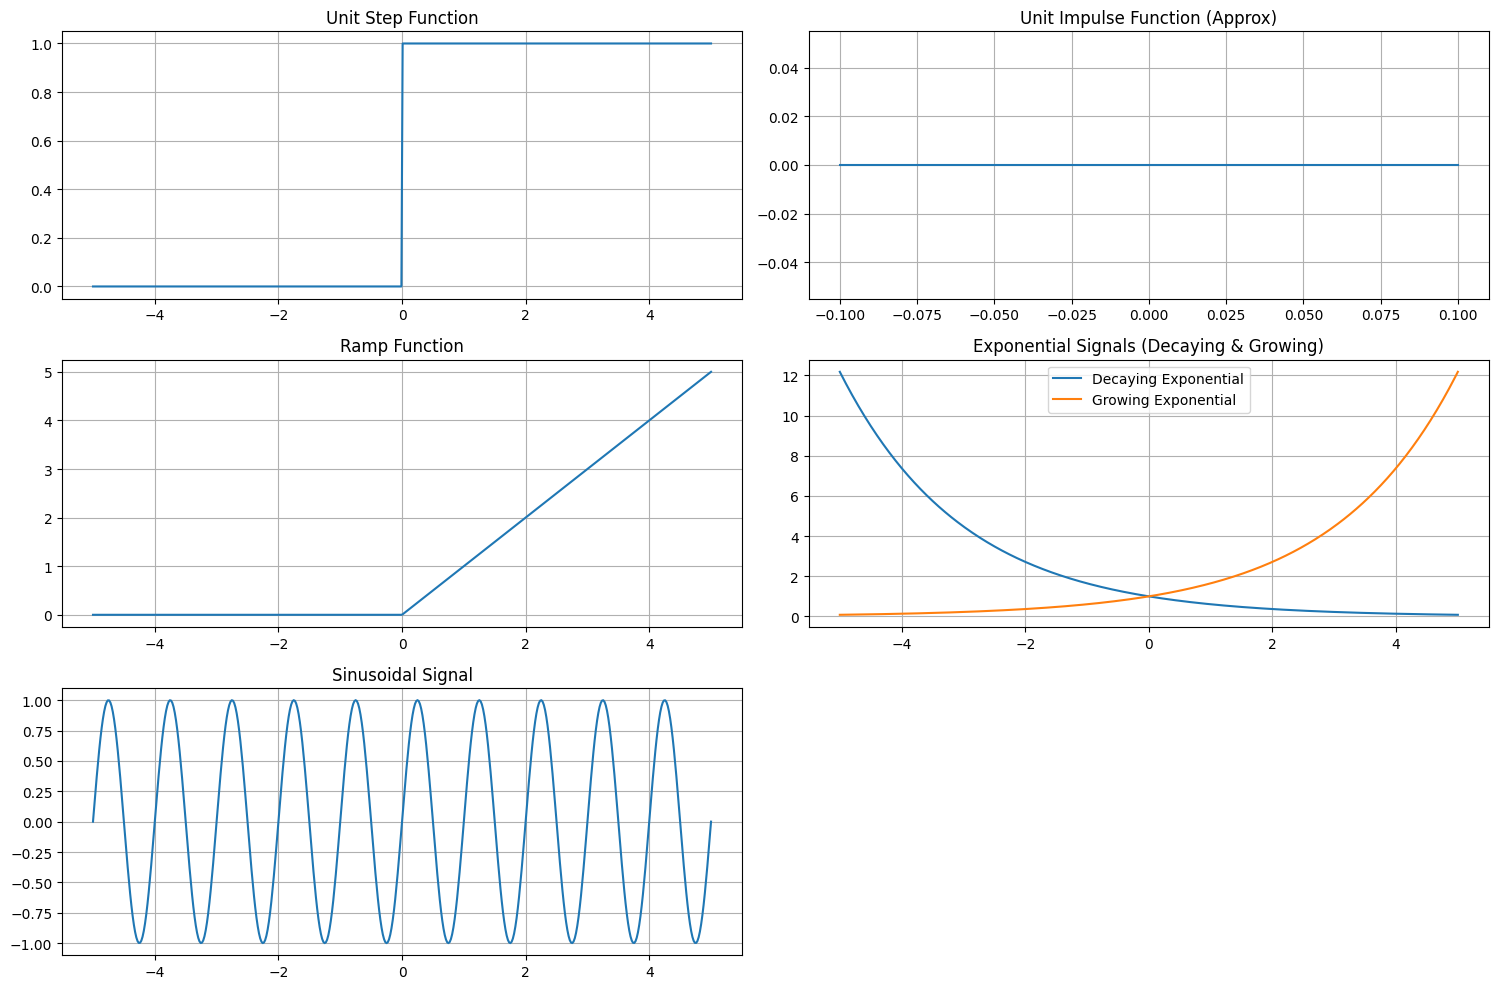

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(-5, 5, 500)

# (a) Unit Step Function
def unit_step(t):
    return np.where(t >= 0, 1, 0)

# (b) Unit Impulse Function
def unit_impulse(t):
    return np.where(t == 0, 1, 0)

# (c) Ramp Function
def ramp(t):
    return np.where(t >= 0, t, 0)

# (d) Exponential Signal
def exp_signal(t, a):
    return np.exp(a * t)

# (e) Sinusoidal Signal
def sinusoidal_signal(t, freq=1, amplitude=1):
    return amplitude * np.sin(2 * np.pi * freq * t)

# Plotting all signals
plt.figure(figsize=(15, 10))

# Unit Step Function
plt.subplot(3, 2, 1)
plt.plot(t, unit_step(t), label='Unit Step Function')
plt.title('Unit Step Function')
plt.grid(True)

# Unit Impulse Function (approximation)
plt.subplot(3, 2, 2)
impulse_t = np.linspace(-0.1, 0.1, 500)
plt.plot(impulse_t, unit_impulse(impulse_t), label='Unit Impulse Function')
plt.title('Unit Impulse Function (Approx)')
plt.grid(True)

# Ramp Function
plt.subplot(3, 2, 3)
plt.plot(t, ramp(t), label='Ramp Function')
plt.title('Ramp Function')
plt.grid(True)

# Exponential Signals
plt.subplot(3, 2, 4)
plt.plot(t, exp_signal(t, -0.5), label='Decaying Exponential')
plt.plot(t, exp_signal(t, 0.5), label='Growing Exponential')
plt.title('Exponential Signals (Decaying & Growing)')
plt.legend()
plt.grid(True)

# Sinusoidal Signal
plt.subplot(3, 2, 5)
plt.plot(t, sinusoidal_signal(t, freq=1), label='Sinusoidal Signal')
plt.title('Sinusoidal Signal')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


#Q2

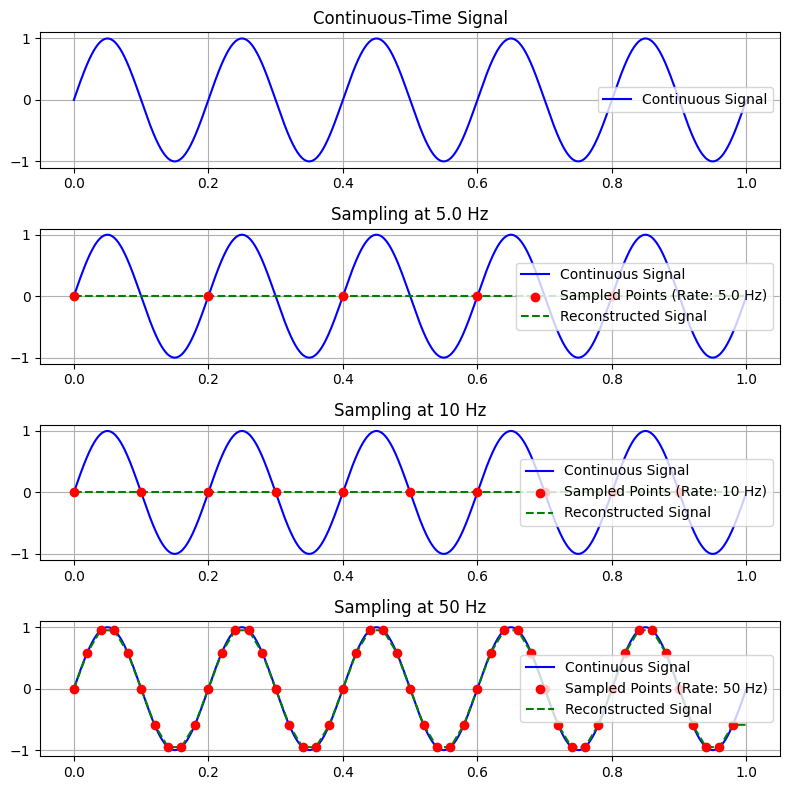

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a continuous sinusoidal signal
def continuous_signal(t, freq=5, amplitude=1):
    return amplitude * np.sin(2 * np.pi * freq * t)

# (b) Sample the signal at different rates
def sample_signal(t, freq, sample_rate):
    ts = np.arange(t[0], t[-1], 1/sample_rate)  # Discrete time samples
    sampled_signal = continuous_signal(ts, freq)
    return ts, sampled_signal

# Reconstruct using zero-order hold (simple approximation)
def reconstruct_signal(ts, sampled_signal, t):
    return np.interp(t, ts, sampled_signal)

# Parameters
signal_freq = 5    # Frequency of the continuous signal
amplitude = 1      # Amplitude of the sinusoidal signal
duration = 1       # Duration in seconds
t_continuous = np.linspace(0, duration, 1000)  # Continuous time vector

# Nyquist rate (Sampling rate should be at least twice the signal frequency)
nyquist_rate = 2 * signal_freq

# (b) Sampling at different rates
sampling_rates = [0.5 * nyquist_rate, nyquist_rate, 5 * nyquist_rate]  # Below, Nyquist, and Above

# Smaller figure size
plt.figure(figsize=(8, 8))  # Reduced figure size

# (d) Plot the original continuous signal
plt.subplot(4, 1, 1)
plt.plot(t_continuous, continuous_signal(t_continuous, signal_freq), label='Continuous Signal', color='blue')
plt.title('Continuous-Time Signal')
plt.grid(True)
plt.legend()

# (c) Sample, reconstruct, and plot at each sampling rate
for i, sample_rate in enumerate(sampling_rates):
    ts, sampled_signal = sample_signal(t_continuous, signal_freq, sample_rate)
    reconstructed_signal = reconstruct_signal(ts, sampled_signal, t_continuous)

    plt.subplot(4, 1, i + 2)  # Correct subplot index

    # Plot continuous signal
    plt.plot(t_continuous, continuous_signal(t_continuous, signal_freq), label='Continuous Signal', color='blue')

    # Plot sampled points
    plt.scatter(ts, sampled_signal, color='red', label=f'Sampled Points (Rate: {sample_rate} Hz)', zorder=3)

    # Plot reconstructed signal
    plt.plot(t_continuous, reconstructed_signal, label='Reconstructed Signal', color='green', linestyle='--', zorder=2)

    # Title and grid
    plt.title(f'Sampling at {sample_rate} Hz')
    plt.grid(True)
    plt.legend()

# Show plots
plt.tight_layout()
plt.show()


#Q3

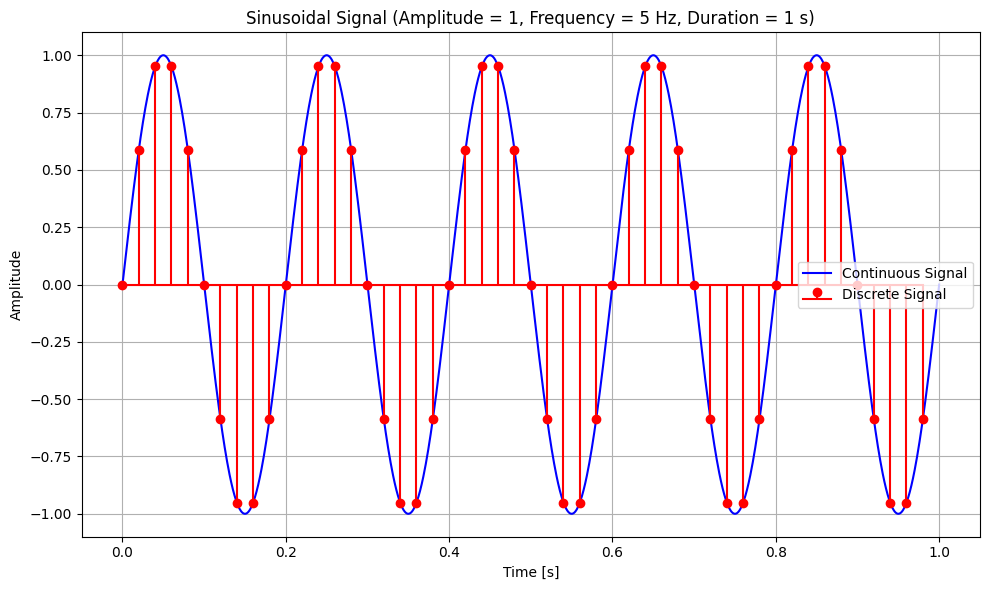

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 1      # Amplitude of the signal
frequency = 5      # Frequency of the signal in Hz
duration = 1       # Duration of the signal in seconds
sampling_rate = 50  # Sampling rate for discrete signal (50 samples per second)

# Time vectors for continuous and discrete signals
t_continuous = np.linspace(0, duration, 1000)  # Fine time resolution for continuous signal
t_discrete = np.arange(0, duration, 1/sampling_rate)  # Coarser time resolution for discrete signal

# Generate the sinusoidal signals
continuous_signal = amplitude * np.sin(2 * np.pi * frequency * t_continuous)
discrete_signal = amplitude * np.sin(2 * np.pi * frequency * t_discrete)

# Plot the continuous and discrete signals
plt.figure(figsize=(10, 6))

# Plot the continuous signal
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='blue')

# Plot the discrete signal
plt.stem(t_discrete, discrete_signal, linefmt='r-', markerfmt='ro', basefmt='r-', label='Discrete Signal')

# Titles and labels
plt.title(f'Sinusoidal Signal (Amplitude = {amplitude}, Frequency = {frequency} Hz, Duration = {duration} s)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


#Q4

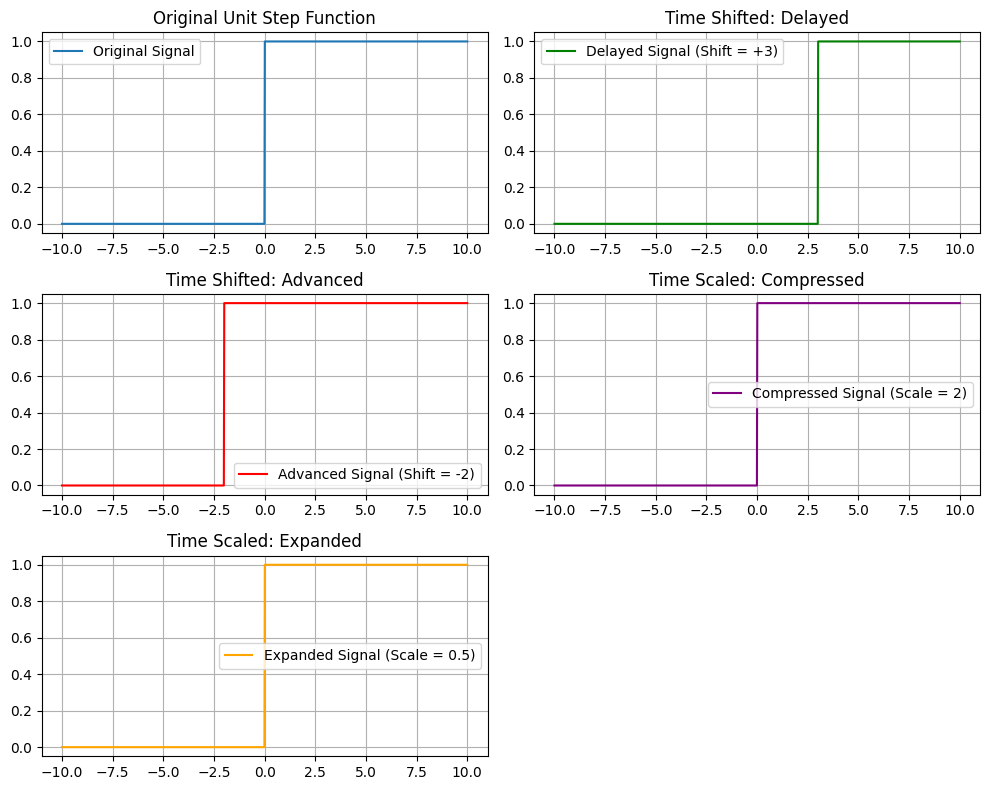

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a unit step function
def unit_step(t):
    return np.where(t >= 0, 1, 0)

# (b) Perform time shifting
def time_shift(signal, t, shift):
    return signal(t - shift)

# (c) Perform time scaling
def time_scale(signal, t, scale):
    return signal(t / scale)

# Parameters
duration = 10  # Total time for the signal (from -10 to 10)
t = np.linspace(-10, 10, 1000)  # Time vector

# Generate the original unit step signal
original_signal = unit_step(t)

# (b) Time shifting: Delaying by 3 units and advancing by 2 units
delayed_signal = time_shift(unit_step, t, shift=3)
advanced_signal = time_shift(unit_step, t, shift=-2)

# (c) Time scaling: Compressing by 2 and expanding by 0.5
compressed_signal = time_scale(unit_step, t, scale=2)
expanded_signal = time_scale(unit_step, t, scale=0.5)

# (d) Plotting the original and transformed signals
plt.figure(figsize=(10, 8))

# Plot original unit step signal
plt.subplot(3, 2, 1)
plt.plot(t, original_signal, label='Original Signal')
plt.title('Original Unit Step Function')
plt.grid(True)
plt.legend()

# Plot delayed signal
plt.subplot(3, 2, 2)
plt.plot(t, delayed_signal, label='Delayed Signal (Shift = +3)', color='green')
plt.title('Time Shifted: Delayed')
plt.grid(True)
plt.legend()

# Plot advanced signal
plt.subplot(3, 2, 3)
plt.plot(t, advanced_signal, label='Advanced Signal (Shift = -2)', color='red')
plt.title('Time Shifted: Advanced')
plt.grid(True)
plt.legend()

# Plot compressed signal
plt.subplot(3, 2, 4)
plt.plot(t, compressed_signal, label='Compressed Signal (Scale = 2)', color='purple')
plt.title('Time Scaled: Compressed')
plt.grid(True)
plt.legend()

# Plot expanded signal
plt.subplot(3, 2, 5)
plt.plot(t, expanded_signal, label='Expanded Signal (Scale = 0.5)', color='orange')
plt.title('Time Scaled: Expanded')
plt.grid(True)
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


#Q5

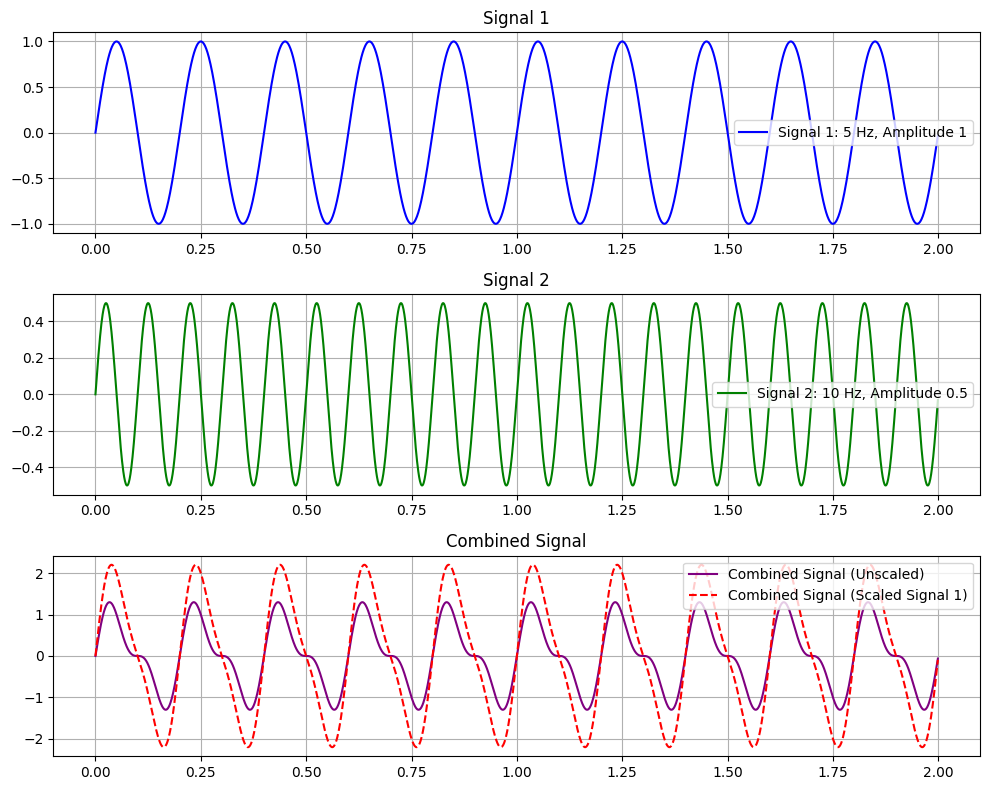

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate two sinusoidal signals with different frequencies and amplitudes
def generate_sinusoidal_signal(t, frequency, amplitude):
    return amplitude * np.sin(2 * np.pi * frequency * t)

# Parameters
duration = 2        # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz
t = np.linspace(0, duration, duration * sampling_rate, endpoint=False)  # Time vector

# Define parameters for two signals
frequency1 = 5   # Frequency of the first signal in Hz
amplitude1 = 1    # Amplitude of the first signal

frequency2 = 10  # Frequency of the second signal in Hz
amplitude2 = 0.5  # Amplitude of the second signal

# Generate the two sinusoidal signals
signal1 = generate_sinusoidal_signal(t, frequency1, amplitude1)
signal2 = generate_sinusoidal_signal(t, frequency2, amplitude2)

# (b) Add the signals together
combined_signal = signal1 + signal2

# (c) Scale one of the signals (e.g., scale signal1 by a factor of 2)
scaled_signal1 = 2 * signal1

# Recalculate the combined signal with the scaled signal
combined_signal_scaled = scaled_signal1 + signal2

# Plot the results
plt.figure(figsize=(10, 8))

# Plot the first sinusoidal signal
plt.subplot(3, 1, 1)
plt.plot(t, signal1, label=f'Signal 1: {frequency1} Hz, Amplitude {amplitude1}', color='blue')
plt.title('Signal 1')
plt.grid(True)
plt.legend()

# Plot the second sinusoidal signal
plt.subplot(3, 1, 2)
plt.plot(t, signal2, label=f'Signal 2: {frequency2} Hz, Amplitude {amplitude2}', color='green')
plt.title('Signal 2')
plt.grid(True)
plt.legend()

# Plot the combined signal
plt.subplot(3, 1, 3)
plt.plot(t, combined_signal, label='Combined Signal (Unscaled)', color='purple')
plt.plot(t, combined_signal_scaled, label='Combined Signal (Scaled Signal 1)', linestyle='--', color='red')
plt.title('Combined Signal')
plt.grid(True)
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


#Q6

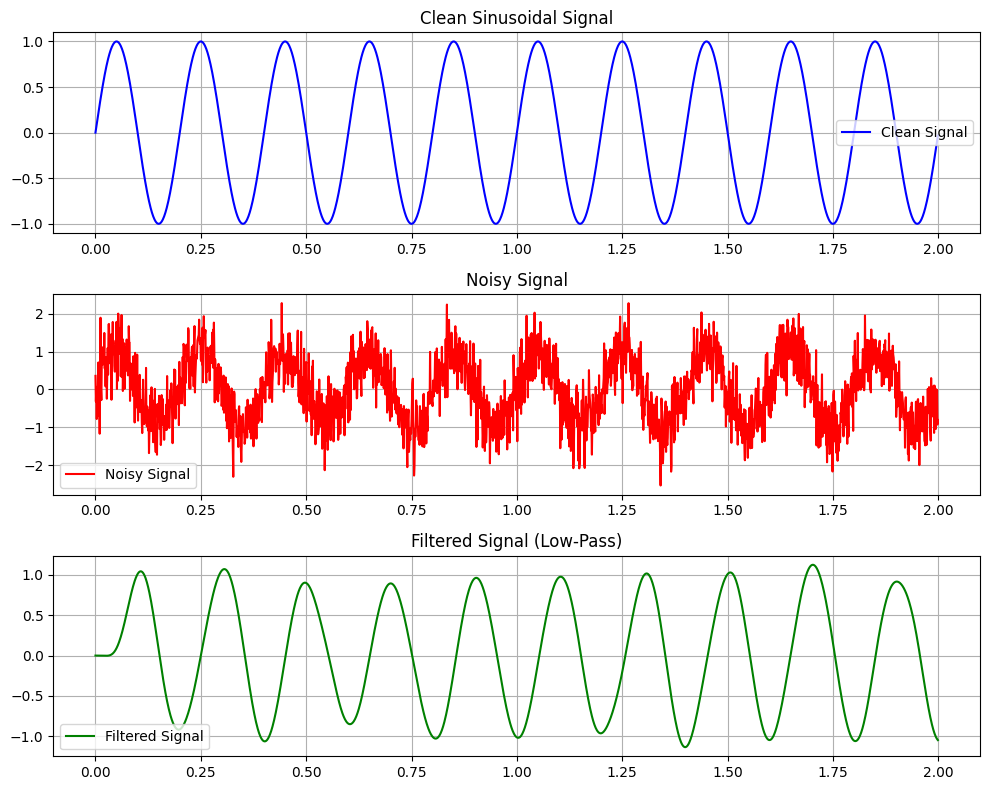

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# (a) Generate a clean sinusoidal signal
def generate_sinusoidal_signal(t, frequency, amplitude):
    return amplitude * np.sin(2 * np.pi * frequency * t)

# (b) Add random Gaussian noise to the signal
def add_gaussian_noise(signal, noise_level):
    noise = np.random.normal(0, noise_level, len(signal))
    return signal + noise

# (c) Apply a low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

# Parameters
duration = 2           # Duration of the signal in seconds
sampling_rate = 1000   # Sampling rate in Hz
frequency = 5          # Frequency of the sinusoidal signal in Hz
amplitude = 1          # Amplitude of the sinusoidal signal
noise_level = 0.5      # Standard deviation of Gaussian noise
cutoff_frequency = 10  # Cutoff frequency of the low-pass filter in Hz

# Time vector
t = np.linspace(0, duration, duration * sampling_rate, endpoint=False)

# Generate the clean sinusoidal signal
clean_signal = generate_sinusoidal_signal(t, frequency, amplitude)

# Add Gaussian noise to the signal
noisy_signal = add_gaussian_noise(clean_signal, noise_level)

# Apply a low-pass filter to the noisy signal
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff_frequency, sampling_rate)

# Plotting the results
plt.figure(figsize=(10, 8))

# Plot the clean signal
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, label='Clean Signal', color='blue')
plt.title('Clean Sinusoidal Signal')
plt.grid(True)
plt.legend()

# Plot the noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label='Noisy Signal', color='red')
plt.title('Noisy Signal')
plt.grid(True)
plt.legend()

# Plot the filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Filtered Signal', color='green')
plt.title('Filtered Signal (Low-Pass)')
plt.grid(True)
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


#Q7

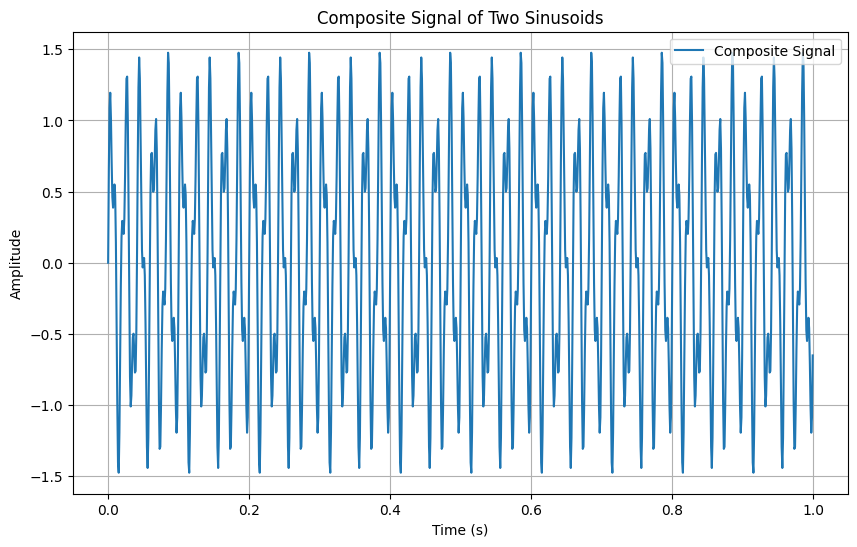

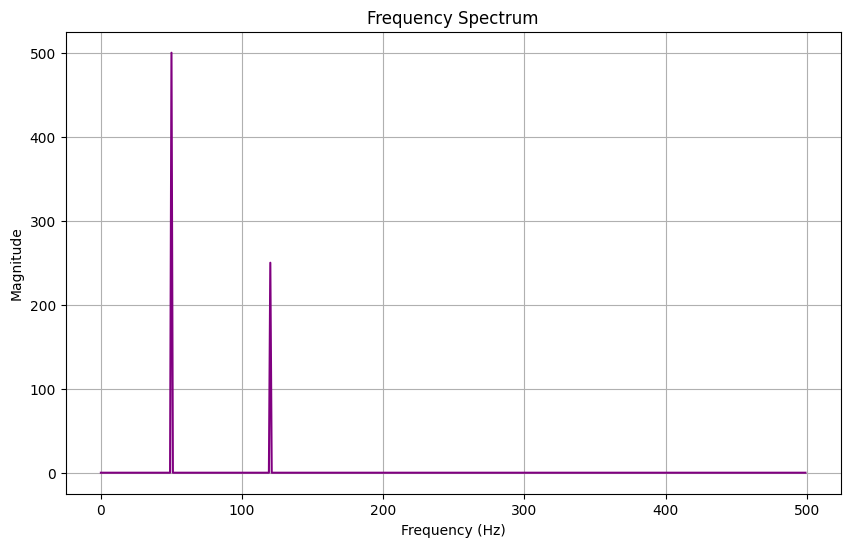

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a composite signal made up of two sinusoids of different frequencies
def generate_composite_signal(t, freq1, freq2, amp1, amp2):
    signal1 = amp1 * np.sin(2 * np.pi * freq1 * t)
    signal2 = amp2 * np.sin(2 * np.pi * freq2 * t)
    return signal1 + signal2

# Parameters
duration = 1           # Duration of the signal in seconds
sampling_rate = 1000   # Sampling rate in Hz
frequency1 = 50        # Frequency of the first sinusoid in Hz
frequency2 = 120       # Frequency of the second sinusoid in Hz
amplitude1 = 1         # Amplitude of the first sinusoid
amplitude2 = 0.5       # Amplitude of the second sinusoid

# Time vector
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate the composite signal
composite_signal = generate_composite_signal(t, frequency1, frequency2, amplitude1, amplitude2)

# (b) Perform Fast Fourier Transform (FFT) and plot the frequency spectrum
def plot_fft(signal, sampling_rate):
    n = len(signal)
    fft_values = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(n, 1 / sampling_rate)

    # Plotting the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freqs[:n // 2], np.abs(fft_values)[:n // 2], color='purple')
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Plot the composite signal
plt.figure(figsize=(10, 6))
plt.plot(t, composite_signal, label='Composite Signal')
plt.title('Composite Signal of Two Sinusoids')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Perform FFT and plot the frequency spectrum
plot_fft(composite_signal, sampling_rate)


#Q8

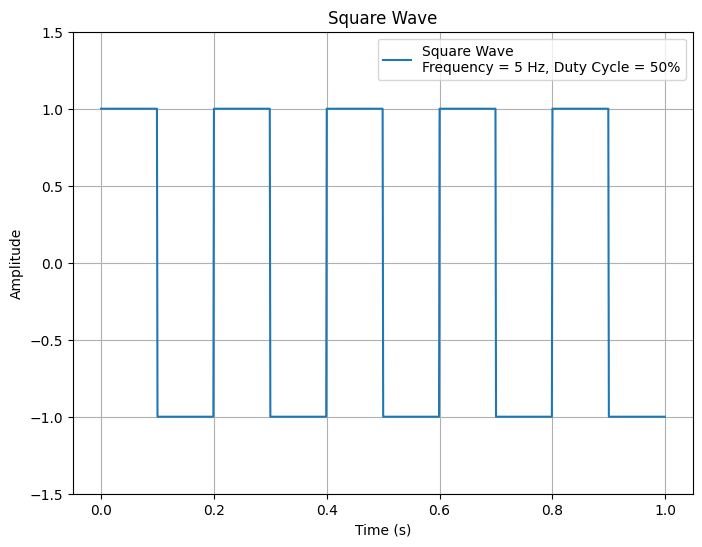

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# Parameters
duration = 1          # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz
frequency = 5         # Frequency of the square wave in Hz
duty_cycle = 50       # Duty cycle of the square wave in percentage (0-100%)

# Time vector
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate the square wave
square_wave = square(2 * np.pi * frequency * t, duty=duty_cycle / 100.0)

# Plot the square wave
plt.figure(figsize=(8, 6))
plt.plot(t, square_wave, label=f'Square Wave\nFrequency = {frequency} Hz, Duty Cycle = {duty_cycle}%')
plt.title('Square Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.ylim(-1.5, 1.5)  # Adjust y-axis limits for better visibility
plt.show()


#Q9

<ipython-input-25-6f3879a67113>:33: RuntimeWarning: divide by zero encountered in divide
  H_z = np.polyval(b, z) / np.polyval(a, z)
<ipython-input-25-6f3879a67113>:33: RuntimeWarning: invalid value encountered in divide
  H_z = np.polyval(b, z) / np.polyval(a, z)


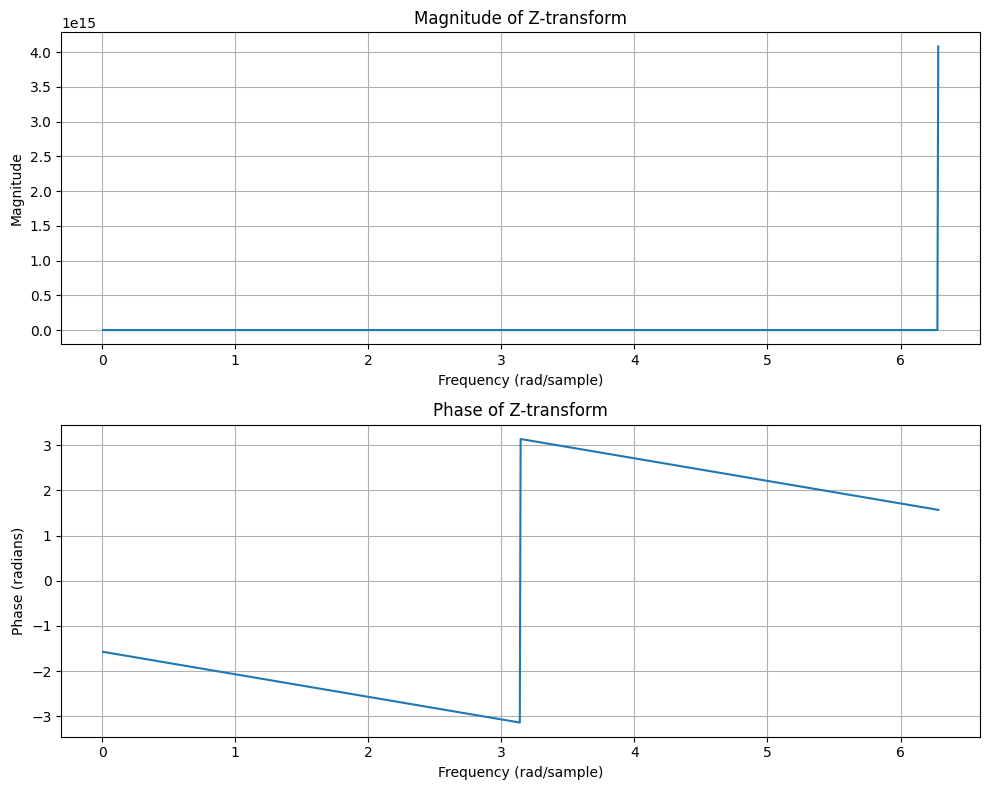

Zeros of the Z-transform: []
Poles of the Z-transform: [1.]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, tf2zpk, lti, lti, step, impulse
from scipy.fft import fft, fftfreq

# (a) Generate a simple discrete-time signal (unit step)
def unit_step(n):
    return np.where(n >= 0, 1, 0)

# Parameters
N = 50           # Number of samples
n = np.arange(N) # Sample indices

# Generate unit step signal
x = unit_step(n)

# (b) Apply the Z-transform to the signal
# For a unit step signal, H(z) = 1 / (1 - z^-1)
# Z-transform of unit step function is H(z) = 1 / (1 - z^-1)

# Define the transfer function of the Z-transform
b = [1]  # Numerator coefficients
a = [1, -1]  # Denominator coefficients

# Calculate poles and zeros
zeros, poles, _ = tf2zpk(b, a)

# Frequency range for plotting the Z-transform
omega = np.linspace(0, 2 * np.pi, 1000)
z = np.exp(1j * omega)  # Z = e^(j*omega)

# Compute the Z-transform (H(z))
H_z = np.polyval(b, z) / np.polyval(a, z)

# (c) Plot the Z-transform (Magnitude and Phase)
plt.figure(figsize=(10, 8))

# Plot Magnitude
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(H_z))
plt.title('Magnitude of Z-transform')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot Phase
plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(H_z))
plt.title('Phase of Z-transform')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Discussion of Poles and Zeros
print(f'Zeros of the Z-transform: {zeros}')
print(f'Poles of the Z-transform: {poles}')
